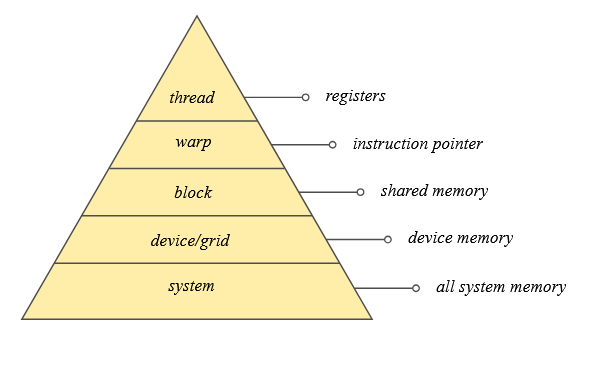

In [5]:
from IPython.display import Image, display
 
image_path = r"F:\works\DeepLearning\Cuda\1. GPU DESIGN\images\Logical\Thread-Architecture.png"
display(Image(filename=image_path))


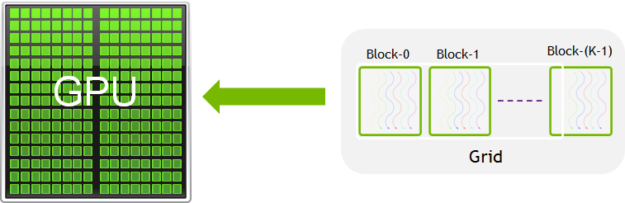

In [6]:
from IPython.display import Image, display
 
image_path = r"F:\works\DeepLearning\Cuda\1. GPU DESIGN\images\Logical\Grid.png"

display(Image(filename=image_path))



### **GRID**  

---

## 💠 What is a Grid in CUDA?

A **grid** is a **logical collection of thread blocks** used to execute a **CUDA kernel** .

### In simple terms:

When you launch a CUDA kernel, you tell the GPU:

 **“Hey, run this function on this many thread blocks.”**

All those blocks together form a **grid**.

---

### 📦 Grid Structure

A grid is:

* Made up of **blocks** (called "thread blocks")
* Many **Block** = **1 GRID** (it do have limit)
* Each block contains **threads**
* So:

  ``` cpp

  Grid
   └── Block[0]
       └── Thread[0], Thread[1], ..., Thread[N]
   └── Block[1]
       └── Thread[0], Thread[1], ..., Thread[N]
   ...

  ```

---

### 📌 Defined During Kernel Launch

```cpp
kernel<<<dim3(gridDimX, gridDimY, gridDimZ), dim3(blockDimX, blockDimY, blockDimZ)>>>();
```

* You specify **grid dimensions** and **block dimensions**
* CUDA internally calculates how many threads you want and maps them to physical hardware

---

### 🧠 Important Notes

| Property       | Value                                                    |
| -------------- | -------------------------------------------------------- |
| Grid Type      | **Logical**                                              |
| Contains       | Multiple thread blocks                                   |
| Purpose        | Organize parallel work                                   |
| Max Dimensions | Up to (2,147,483,647, 65,535, 65,535) (rtx-3060)         |
| Life Span      | Exists **only during kernel execution**                  |

---

### ✅ Summary

> A **grid** is just a **logical layout** of **blocks** used to execute a **GPU kernel** in CUDA.
> It tells the GPU *how much parallelism* to use, but it’s not a physical object — it's mapped to real hardware at runtime.

---


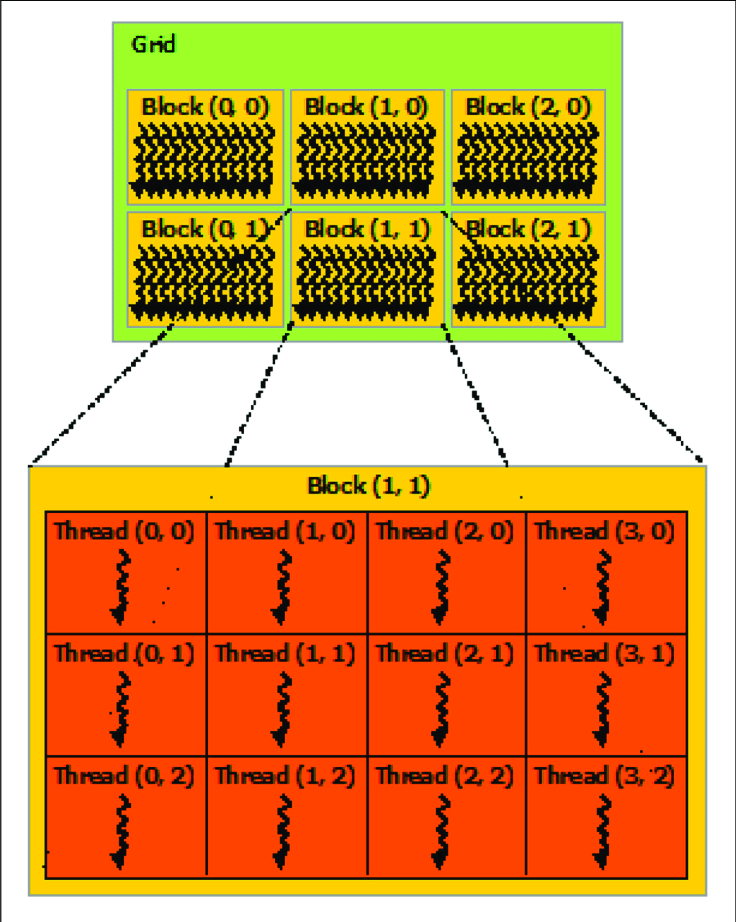

In [7]:

image_path = r"F:\works\DeepLearning\Cuda\1. GPU DESIGN\images\Logical\grid-block.png"

display(Image(filename=image_path))

## **Thread Block**
---

## 🧱 What is a Thread Block?

A **thread block** (also called a **block**) is a **group of threads** that:

* Work **together**
* Share **resources**
* Execute on the **same Streaming Multiprocessor (SM)**

> Think of a thread block as a "team" of threads that cooperate closely.

---

## 🧬 Structure

* A thread block is defined with **1D, 2D, or 3D** layout:

```cpp
kernel<<<gridDim, blockDim>>>();
```

* `blockDim` is how many **threads per block** you want.

Example:

```cpp
kernel<<<dim3(2, 2), dim3(8, 8)>>>();
```

Here:

* You have **2×2 = 4 blocks**
* Each block has **8×8 = 64 threads**
* So total threads: `4 blocks × 64 threads = 256 threads`

---

## 🧠 Key Properties of a Thread Block

| Property               | Description                                                                   |
| ---------------------- | ----------------------------------------------------------------------------- |
| Max Threads per Block  | Device-dependent, usually **1024**                                            |
| Shared Memory          | Threads in a block can share memory (`__shared__`)                            |
| Sync Possible          | Threads can **synchronize** using `__syncthreads()`                           |
| Executes on One SM     | All threads in a block are scheduled on **the same Streaming Multiprocessor** |
| Identified By          | `blockIdx` — tells you which block this is in the grid                        |
| Thread ID inside block | `threadIdx` — tells you which thread this is inside its block                 |

---

## 🧭 Accessing Thread Block Info in Kernel

```cpp
__global__ void kernel() {
    int bx = blockIdx.x;     // Block index in x-dimension
    int tx = threadIdx.x;    // Thread index inside the block
    int global_id = bx * blockDim.x + tx; // Unique thread ID in 1D
}
```
 
---

## 🏗️ Summary

> A **Thread Block** is a **logical group of threads** that are:
>
> * Executed on **one SM**
> * Able to **communicate and synchronize**
> * Given a chunk of **shared memory**
> * Limited in size (typically up to 1024 threads)

---
 


## 🧭What is **Thread Block Dimensions**?

In CUDA, you can define a **1D, 2D, or 3D thread block** using the `dim3` data type.

This is useful when:

* You are working with data that is naturally **1D (arrays)**, **2D (images)**, or **3D (volumes)**
* You want an easy way to map **thread IDs to data coordinates**

---

### 📦 Syntax: Launching Threads with Dimensions

```cpp
dim3 blockDim(x, y, z);
kernel<<<gridDim, blockDim>>>();
```

* `blockDim` defines **how many threads per block**
* Maximum threads per block (regardless of dimensions) is usually **1024**

---

## 💡 Example Dimensions

### 1️⃣ 1D Block

```cpp
dim3 blockDim(256);
```

* You get 256 threads
* Access each thread with `threadIdx.x`

---

### 2️⃣ 2D Block (e.g., for images)

```cpp
dim3 blockDim(16, 16);
```

* 16 × 16 = 256 threads per block
* Threads are arranged in a 2D grid
* Access with:

  ```cpp
  int x = threadIdx.x;
  int y = threadIdx.y;
  ```

---

### 3️⃣ 3D Block (e.g., for 3D volumes)

```cpp
dim3 blockDim(8, 8, 8);
```

* 8 × 8 × 8 = 512 threads per block
* Threads are arranged in a 3D cube
* Access with:

  ```cpp
  int x = threadIdx.x;
  int y = threadIdx.y;
  int z = threadIdx.z;
  ```

---

## 🔗 Mapping Threads to Data

Let’s say you're processing a 2D image. Using a 2D block makes indexing easier:

```cpp
int row = blockIdx.y * blockDim.y + threadIdx.y;
int col = blockIdx.x * blockDim.x + threadIdx.x;
```

This gives you a **global index** for each thread that matches the pixel position.

---

## ⚠️ Maximum Dimensions

The **maximum size** for each dimension of a thread block is device-dependent.

Typical limits:

* `blockDim.x ≤ 1024`
* `blockDim.y ≤ 1024`
* `blockDim.z ≤ 64`
* `blockDim.x × blockDim.y × blockDim.z ≤ 1024`

You can check actual limits using:

```cpp
cudaDeviceProp prop;
cudaGetDeviceProperties(&prop, 0);
std::cout << prop.maxThreadsDim[0] << std::endl; // x
std::cout << prop.maxThreadsDim[1] << std::endl; // y
std::cout << prop.maxThreadsDim[2] << std::endl; // z
```

---

## 🧠 Summary
 
| Dim | Example    | Use Case         | Max Range  |
| --- | ---------- | ---------------- | ---------- |
| 1D  | `(256)`    | Arrays           | ≤ 1024     |
| 2D  | `(16, 16)` | Images (2D grid) | x,y ≤ 1024 |
| 3D  | `(8,8,8)`  | 3D volumes       | z ≤ 64     |
---


## ✅ 1D Thread Block – `dim3(blockDimX)`

### 🔹 Use Case: **Vector Operations / Signal Processing**

#### 🧠 Example:

* Adding two 1D arrays (vectors) element-wise
* Processing a mono-channel audio stream
* Computing prefix sums / dot product

```cpp
// 1D vector addition: C[i] = A[i] + B[i]
kernel<<<ceil(N/256.0), 256>>>(A, B, C, N);
```

---

## ✅ 2D Thread Block – `dim3(blockDimX, blockDimY)`

### 🔹 Use Case: **Image Processing / 2D Grids**

#### 🧠 Example:

* Applying filters (like Gaussian blur) to images
* Edge detection (Sobel, Canny)
* Convolution over 2D matrices
* Heat map simulations

```cpp
// Apply blur on a 2D grayscale image of size HxW
dim3 block(16, 16);
dim3 grid(ceil(W/16.0), ceil(H/16.0));
blur_kernel<<<grid, block>>>(inputImage, outputImage, W, H);
```

---

## ✅ 3D Thread Block – `dim3(blockDimX, blockDimY, blockDimZ)`

### 🔹 Use Case: **3D Data / Scientific Computing / Volumes**

#### 🧠 Example:

* Medical imaging (CT scans, MRI - 3D voxel data)
* Simulating fluid or gas dynamics (e.g., smoke, water)
* Computational physics (finite element methods on 3D meshes)

```cpp
// Simulate pressure in a 3D cube: size D x H x W
dim3 block(8, 8, 8);
dim3 grid(ceil(W/8.0), ceil(H/8.0), ceil(D/8.0));
simulate_pressure<<<grid, block>>>(volumeIn, volumeOut, W, H, D);
```

---

## 📌 Summary Table

| Dimension | Real-World Use Case            | Example                                     |
| --------- | ------------------------------ | ------------------------------------------- |
| **1D**    | Vector ops, audio, time series | Audio processing, vector math               |
| **2D**    | Image processing, 2D grids     | Blur, edge detection, matrix multiplication |
| **3D**    | Volumetric data, simulations   | MRI scan, fluid dynamics, 3D pressure field |

--- 


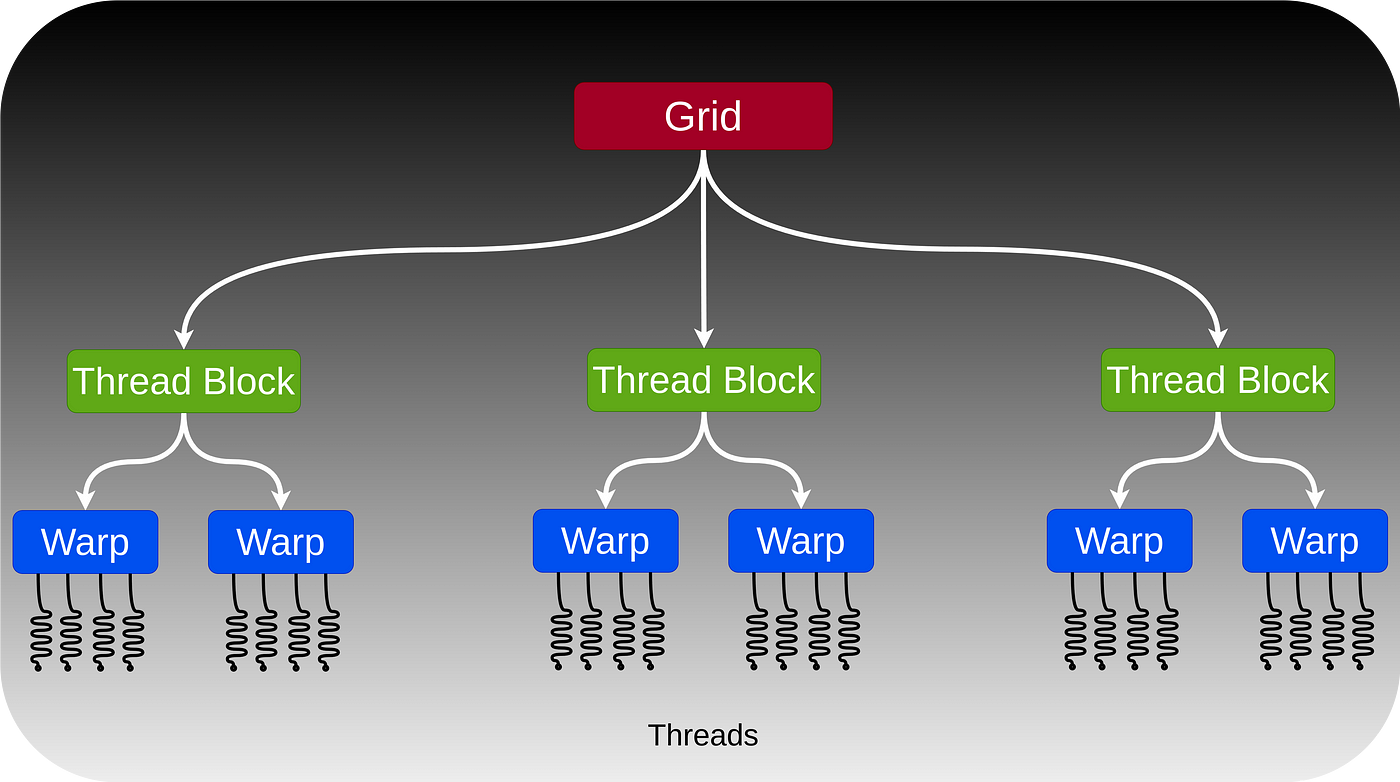

In [9]:

image_path = r"F:\works\DeepLearning\Cuda\1. GPU DESIGN\images\Logical\Warp.png"

display(Image(filename=image_path))

### **Warp**
---

### ⚙️ What is a **Warp** in CUDA?

A **warp** is the **smallest unit of execution** on an NVIDIA GPU.

---

## 🔹 Definition

A **warp** is a group of **32 threads** that execute **in lockstep** — meaning all threads in a warp **execute the same instruction at the same time**, on different data.

---

## 🧠 Why Warps Exist

GPUs are **SIMT** (Single Instruction, Multiple Threads) — this means:

* One instruction is issued for a **group of threads (warp)**
* All threads in the warp **run the same instruction**
* If threads diverge (e.g., `if/else` paths), the warp executes both paths serially (this is called **warp divergence**)

---

## 🧮 Warp Structure and Scheduling

| Term             | Meaning                                    |
| ---------------- | ------------------------------------------ |
| **Warp Size**    | Always 32 threads on modern NVIDIA GPUs    |
| **Thread Block** | Split into warps by hardware automatically |
| **Scheduler**    | Executes **one warp at a time** per SM     |

So, if you have a block of 256 threads:

```bash
256 threads / 32 = 8 warps
```

---

## ✅ Real Example

```cpp
__global__ void myKernel() {
    int globalId = threadIdx.x + blockIdx.x * blockDim.x;
    printf("I am thread %d\n", globalId);
}

myKernel<<<1, 64>>>();  // Launch 64 threads = 2 warps
```

NVIDIA schedules and runs **2 warps** of 32 threads each.

---

## 🚫 Warp Divergence Example (bad)

```cpp
if (threadIdx.x < 16)
    doSomething();
else
    doSomethingElse();
```

This causes **warp divergence**, because some threads in the warp execute `doSomething()` while others take the `else` path — reducing performance.

---

## ✅ Summary

| Concept        | Value                        |
| -------------- | ---------------------------- |
| Warp size      | 32 threads                   |
| Executed by    | Single SM scheduler          |
| Executes       | In lockstep                  |
| Optimized when | All threads follow same path |
| Related issues | Warp divergence, occupancy   |

---

 


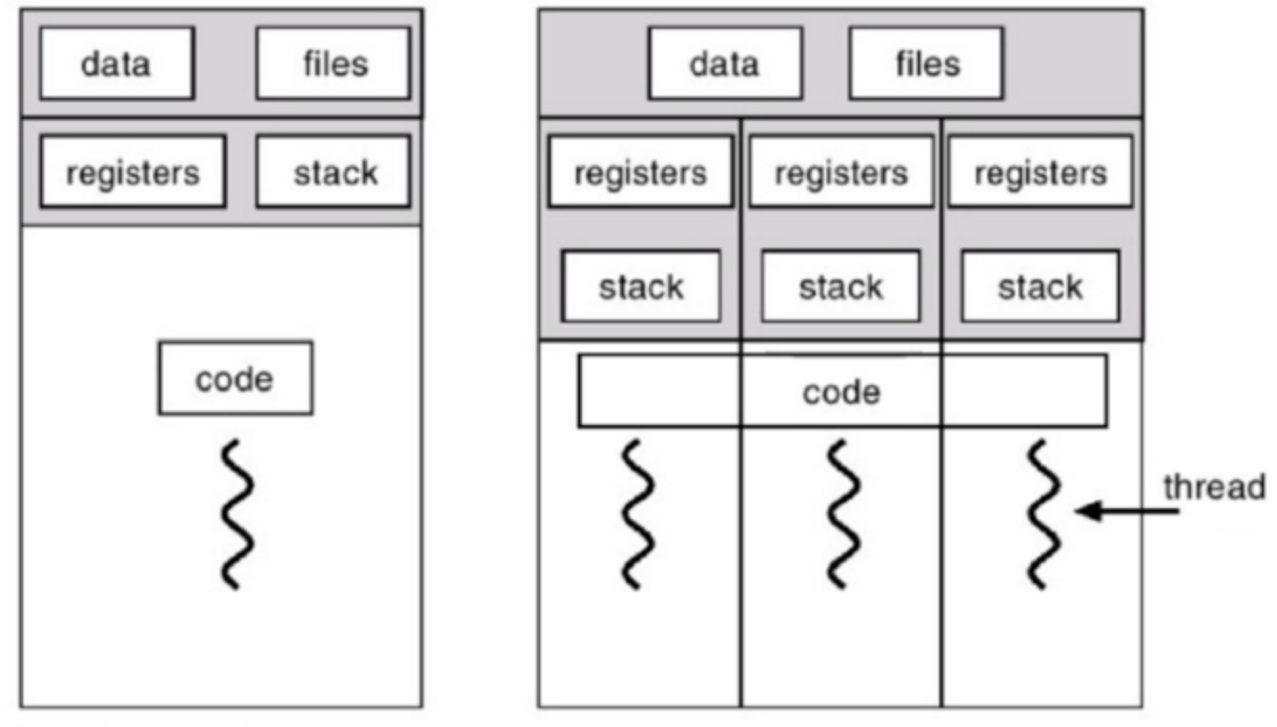

In [11]:

image_path = r"F:\works\DeepLearning\Cuda\1. GPU DESIGN\images\Logical\thread.png"

display(Image(filename=image_path))

### **Thread**
---

### 🧵 What is a **Thread** in CUDA?

In CUDA, a **thread** is the **smallest unit of execution** that runs **on the GPU**.

---

## 🔹 Think of it like this:

Just like in CPU programming, a **thread** is a single path of instructions. But on the GPU, **thousands of threads** run **in parallel** to do the same task on **different data**.

So a **thread in CUDA**:

* Executes **one copy** of the kernel function
* Has a **unique ID** (so it knows what data to process)
* Is part of a **thread block**, which is part of a **grid**

---

## ✅ Example

```cpp
__global__ void myKernel(int *data) {
    int idx = threadIdx.x;
    data[idx] = data[idx] * 2;
}
```

* If you launch this kernel with `myKernel<<<1, 8>>>();`, it creates **8 threads**.
* Each thread will run the kernel **once** with a different `threadIdx.x` value (`0 to 7`).

---

## 🧠 Important Properties

| Term        | Description                                                         |
| ----------- | ------------------------------------------------------------------- |
| `threadIdx` | Thread's local ID **within a block**                                |
| `blockIdx`  | Block's ID in the grid                                              |
| `blockDim`  | Number of threads **per block**                                     |
| `gridDim`   | Number of blocks in the grid                                        |
| `global ID` | Combines `blockIdx` and `threadIdx` to get thread's global position |

---

## 💡 Thread Behavior

Each thread:

* **Runs independently**, but shares memory with others in the same block
* Executes **same code** (kernel), but may work on **different data**
* Can **communicate and synchronize** with other threads in the **same block**, but **not** across blocks directly

---

### 📦 Summary

| Concept           | Value                                        |
| ----------------- | -------------------------------------------- |
| What is it?       | A lightweight, parallel unit of execution    |
| Where is it?      | Inside a thread block                        |
| Runs what?        | One instance of the kernel                   |
| Knows what to do? | Uses its unique `threadIdx` to find its data |

---
 

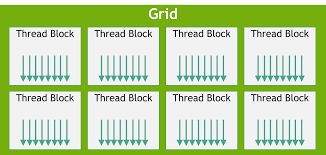

In [12]:

image_path = r"F:\works\DeepLearning\Cuda\1. GPU DESIGN\images\Logical\final.png"

display(Image(filename=image_path))

### **Overall**
---

## 🌟 **GPU Execution Model: CUDA Thread Hierarchy**

---

### 🚀 **One Kernel Launch = One Grid**

Each time you launch a **kernel**, it spawns **one grid** of threads on the GPU.  
Multiple kernel launches? Each gets its **own grid**.  
📌 **Key Idea**: Grids are tied to kernels, not the entire GPU.

---

### 🧱 **CUDA Thread Hierarchy**

CUDA organizes parallelism in a **structured hierarchy**:

- **Grid**: A collection of blocks, defined by each kernel launch.
- **Block**: A group of threads that can **communicate** using **shared memory** and **synchronize** together.
- **Thread**: The smallest execution unit, running the same kernel code with a unique ID.

> 🔎 **Note**: Threads in a block are grouped into **warps** for execution. Check out the "Understanding Warps" section below for details!

---

### 🧠 **What is a Kernel?**

A **kernel** is a GPU function written in **CUDA C/C++**, launched from the CPU (host) with this syntax:

```cpp

kernel<<<gridDim, blockDim>>>();

```

It runs in **parallel** across many lightweight threads.

---

### 💡 **Example: Kernel Launch**

```cpp

kernelA<<<dim3(4, 4), dim3(16, 16)>>>();
// Launches ONE grid with 4 × 4 = 16 blocks
// Each block has 16 × 16 = 256 threads

kernelB<<<dim3(2), dim3(128)>>>();
// Another kernel launch = another SINGLE grid
// This time, 2 blocks with 128 threads each

```

---

### ⚖️ **Grid and Block Limits**

GPUs have **hardware limits** you need to respect:

- **Max threads per block**: `deviceProp.maxThreadsPerBlock`
- **Max block dimensions**: `deviceProp.maxThreadsDim[]`
- **Max grid dimensions**: `deviceProp.maxGridSize[]`

Example `cudaDeviceProp` output:

```output

Max threads per block: 1024
Max threads dim: (1024, 1024, 64)
Max grid size: (2147483647, 65535, 65535)

```

> 🔍 **Tip**: Limits vary by GPU architecture. Check them at runtime with:

```cpp

cudaDeviceProp prop;
cudaGetDeviceProperties(&prop, 0);

```

> ⌛ **Note**: For deeper insights, run the **architecture-understanding.cu** file in **2. architecture-details**.

---

### ✨ **What Is a Lightweight Thread?**

A **lightweight thread** on the GPU is:

- **Low overhead**: Uses minimal memory (few registers, no stack).
- **Fast to create**: Launch **tens of thousands** with ease.
- **Hardware-scheduled**: Managed efficiently by the GPU.
- **Data-parallel**: Perfect for massive parallel operations.

#### 🧠 **Analogy**:

> - **CPU Thread** = 🛻 *Truck* (powerful, heavy, slow to start)  
> - **GPU Thread** = 🛵 *Scooter* (small, fast, thousands can run at once)

---

### 🌀 **Understanding Warps**

Threads in a block are grouped into **warps**, the smallest scheduling unit on the GPU, typically **32 threads** per warp.

- Threads in a warp execute in **lockstep**, running the same instruction simultaneously (but with different data).
- **Divergent control flow** (e.g., threads in an `if` statement taking different paths) can slow things down.
- Warps are handled by GPU hardware—optimizing for them boosts performance.

> 💡 **Tip**: Avoid divergent branches within warps for maximum efficiency.

---

### 🔄 **Kernel Launches and Resource Management**

- **🔁 Grid usage across launches**:  
  Each kernel launch creates a **new grid**. Once it finishes, resources are freed, and the GPU is ready for the next grid. While each grid is unique, the GPU’s hardware resources are effectively **reused** across launches.

- **🧨 Concurrent kernel launches**:  
  Launch **N kernels simultaneously** without waiting (e.g., no synchronization)? If previous kernels haven’t finished:
  - Grids **coexist** on the GPU if there’s enough space.
  - You’re **stacking resources**, not reusing grids.
  - Watch out for bottlenecks in GPU memory, registers, or streaming multiprocessor (SM) scheduling.

- **🔴 Potential issues**:  
  Exceeding resource limits can cause:
  - Runtime errors like:
    - **too many resources requested for launch**
    - **out of memory**
  - Silent hangs (rare, but possible without proper syncing).

- **⚠️ Key point**:  
  CUDA has no hard limit on kernel launches, but it restricts:
  - **Concurrent kernels** based on GPU capabilities.
  - **Resource usage** (threads, shared memory, registers, SM occupancy).

- **✅ Best practices**:  
  - Use `cudaDeviceSynchronize()` to wait for kernels to complete:

    ```cpp

    cudaDeviceSynchronize();

    ```


  - Check GPU capabilities with:

    ```cpp
    
    cudaDeviceProp prop;
    cudaGetDeviceProperties(&prop, 0);
    // Check: prop.concurrentKernels, prop.multiProcessorCount

    ```
  - Use **CUDA streams** wisely for concurrent asynchronous work to overlap computation and data transfer.

---

### ✅ **Summary Table**

| **Concept**                       | **Description**                                         |
|-----------------------------------|---------------------------------------------------------|
| `kernel<<<gridDim, blockDim>>>()` | Launches **one grid** with specified blocks and threads |
| One kernel = one grid             | Multiple kernels → multiple grid launches               |
| Grid contains blocks              | Block contains threads                                  |
| Threads execute the same kernel   | Each thread has unique `threadIdx`, `blockIdx`, etc.    |
| Grid and block sizes are limited  | Query limits using `cudaGetDeviceProperties()`          |
| Warps                             | Groups of 32 threads within a block, executed in lockstep |
| Grid usage                        | New grid per launch; hardware resources reused          |
| Concurrent kernels                | Multiple grids coexist if resources allow               |
| Resource management               | Use sync, streams, and queries to avoid errors          |

---